2. ii. Can one cluster genes based on their expression profile?

UMAP and K-Means Clustering of ILC using RNA-seq dataset

In [171]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [172]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [173]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [174]:
import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


In [175]:
expression_df = pd.read_csv("./data/mmc2.csv", usecols = ["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM","NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp","ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"])

In [176]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression_df)

In [177]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Text(0.5, 1.0, 'UMAP projection of RNA expression data')

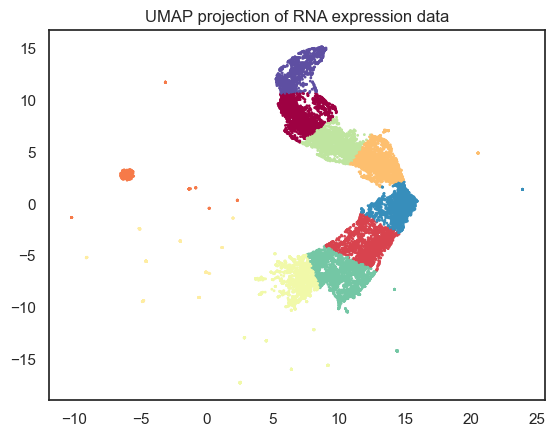

In [179]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=10).fit_predict(X_umap)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='Spectral', s=1)
plt.title('UMAP projection of RNA expression data')

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



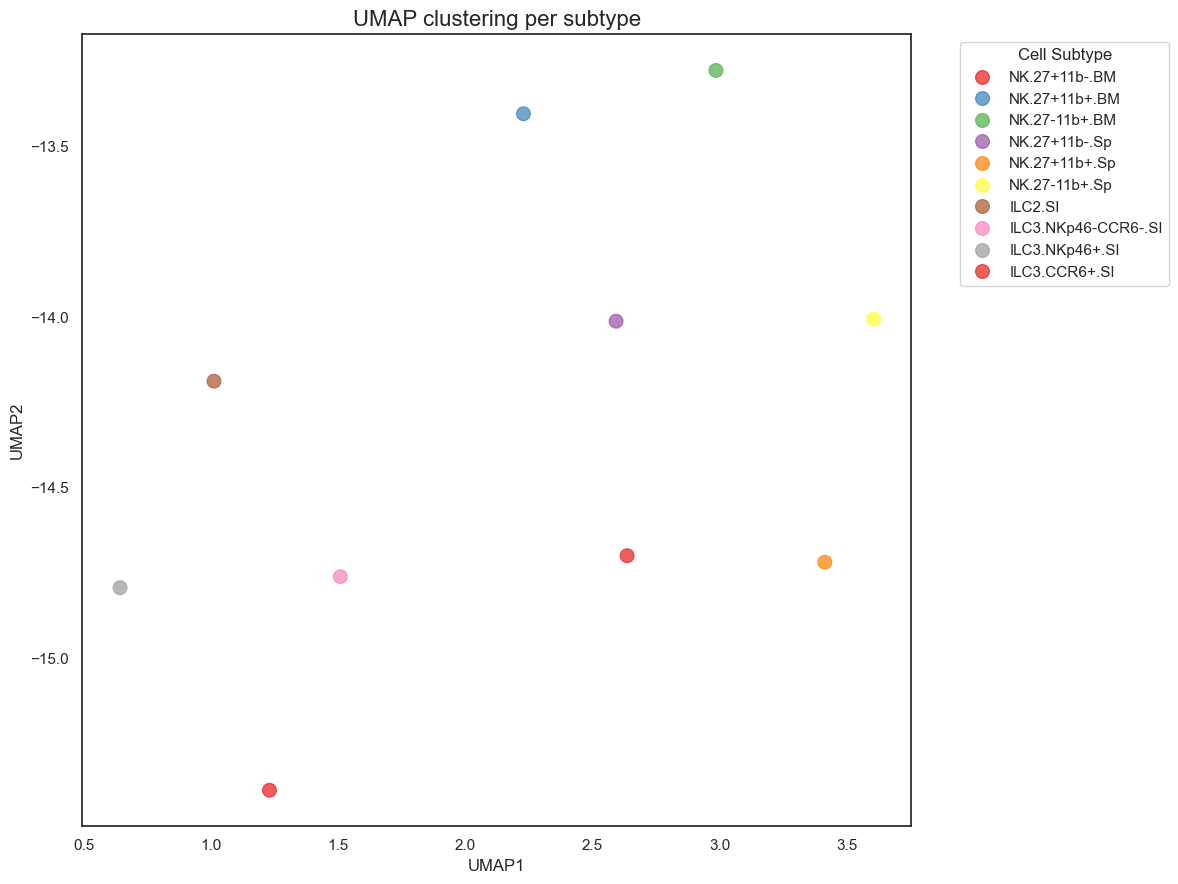

In [159]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

cols = ["NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
        "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp",
        "ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"]

expression_df = pd.read_csv("./data/mmc2.csv", usecols=cols)
expression_T = expression_df.T
expression_T.columns = pd.read_csv("./data/mmc2.csv").iloc[:, 0]  
expression_T.index.name = "subtype"
expression_T.reset_index(inplace=True)

X_scaled = StandardScaler().fit_transform(expression_T.iloc[:, 1:])  

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)


umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
umap_df["subtype"] = expression_T["subtype"]

plt.figure(figsize=(12, 9))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="subtype", palette="Set1", s=100, alpha=0.7, edgecolor=None)
plt.title("UMAP clustering per subtype", fontsize=16)
plt.legend(title="Cell Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


a) Can you determine a specific set of genes for your cell lineage?


Finding top 10 upregulated genes for every cell type using log2 fold change

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./data/mmc2.csv")

genes = df.iloc[:, 0]
expression = df[["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM",
                 "NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp",
                 "ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"]]

expression.index = genes

In [ ]:
import numpy as np

top_genes_per_subtype = {}

for subtype in expression.columns:
    this_group = expression[subtype]
    rest_group = expression.drop(columns=[subtype]).mean(axis=1)
   
    log2fc = np.log2((this_group + 1e-6) / (rest_group + 1e-6))  
    top_genes = log2fc.sort_values(ascending=False).head(10)  
    top_genes_per_subtype[subtype] = top_genes

In [166]:
for subtype, top_genes in top_genes_per_subtype.items():
    print(f"\nTop upregulated genes in {subtype}:")
    print(top_genes)


Top upregulated genes in NK.27+11b-.BM:
Unnamed: 0
Pif1       3.535772
Hmmr       3.481812
Kbtbd13    3.369142
Ccnb2      3.340168
Kif2c      3.164351
Cdca3      2.908387
Ccna2      2.847665
Tmem121    2.836976
Mxd3       2.729397
Cdc25c     2.675929
dtype: float64

Top upregulated genes in NK.27+11b+.BM:
Unnamed: 0
9130019P16Rik    3.008208
Tcf23            2.663254
Ptk7             2.560867
Bmx              2.449869
Atp1a2           2.445330
Astl             2.435122
Smoc1            2.392631
Pcdhgb1          2.341758
Pcdhb17          2.317716
6030408B16Rik    2.287681
dtype: float64

Top upregulated genes in NK.27-11b+.BM:
Unnamed: 0
Pth1r            4.647213
Agtr2            4.536899
Trim60           4.513688
Wnt7b            4.477865
Gm382            4.121233
4931431F19Rik    4.086341
5330413P13Rik    4.060688
Dact1            4.036725
Zfp804a          4.002481
Il6ra            3.932045
dtype: float64

Top upregulated genes in NK.27+11b-.Sp:
Unnamed: 0
Cd22       4.094915
Id3    

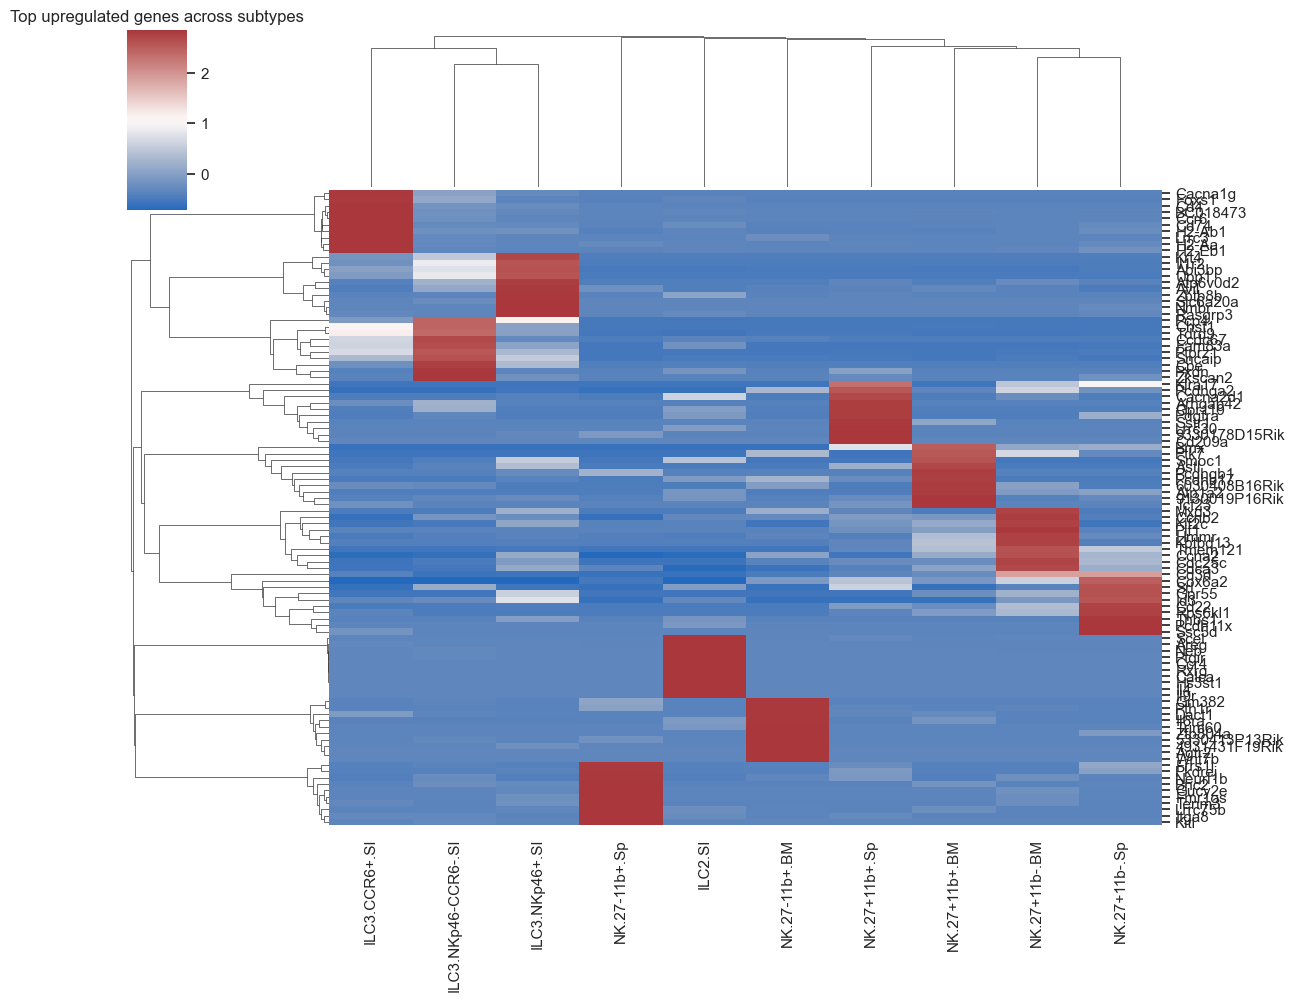

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

all_top_genes = pd.Index(
    np.unique(np.concatenate([genes.index for genes in top_genes_per_subtype.values()]))
)
heatmap_data = expression.loc[all_top_genes]

heatmap_z = (heatmap_data - heatmap_data.mean(axis=1).values[:, None]) / heatmap_data.std(axis=1).values[:, None]

sns.clustermap(
    heatmap_z,
    cmap="vlag",
    col_cluster=True,
    row_cluster=True,
    figsize=(12, 10),
    xticklabels=True,
    yticklabels=True
)
plt.title("Top upregulated genes across subtypes")
plt.show()

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



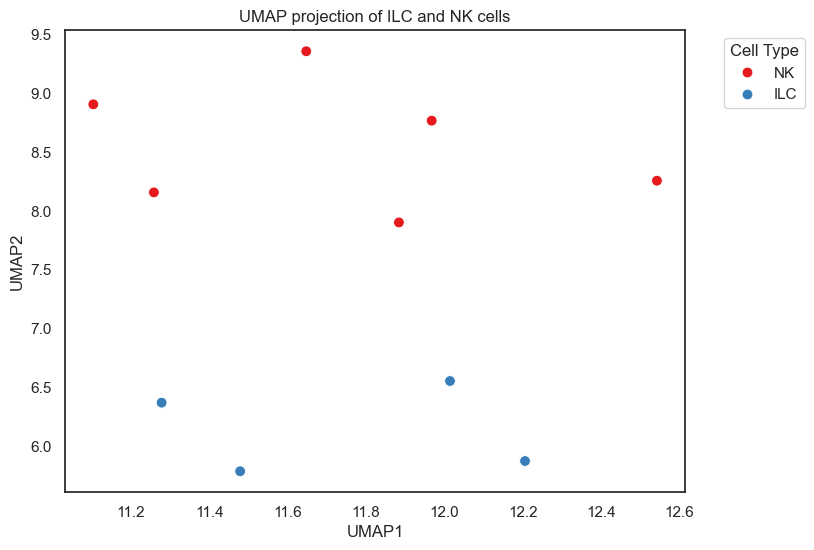

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/mmc2.csv", index_col=0)  

selected_columns = [col for col in df.columns if "ILC" in col or "NK.27" in col]
df_filtered = df[selected_columns]

df_transposed = df_filtered.T


reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(df_transposed)

cell_type_labels = ["ILC" if "ILC" in name else "NK" for name in df_transposed.index]

umap_df = pd.DataFrame({
    "UMAP1": X_umap[:, 0],
    "UMAP2": X_umap[:, 1],
    "CellType": cell_type_labels
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType", palette="Set1", s=60)
plt.title("UMAP projection of ILC and NK cells")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

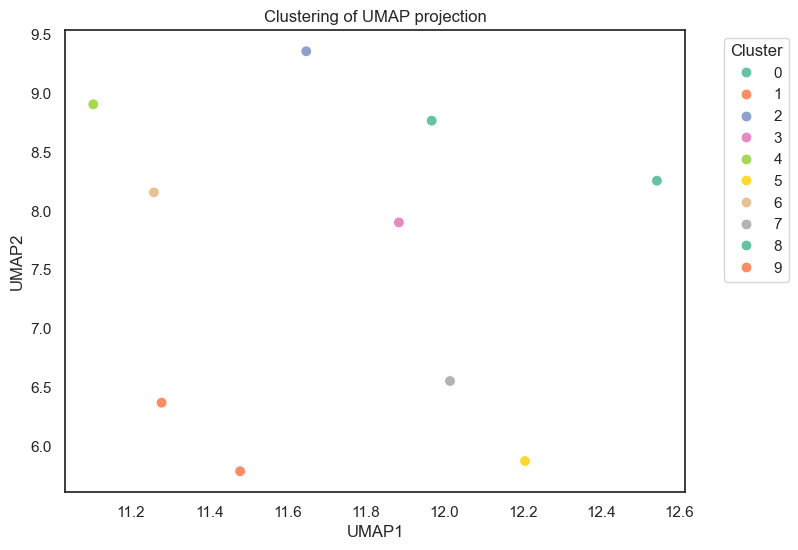

In [163]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_umap)

umap_df["Cluster"] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Cluster", palette="Set2", s=60)
plt.title("Clustering of UMAP projection")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [105]:

df_transposed["Cluster"] = clusters

mean_expr = df_transposed.groupby("Cluster").mean()

log2_fc = (mean_expr.loc[0] + 1).apply(np.log2) - (mean_expr.loc[1] + 1).apply(np.log2)
log2_fc = log2_fc.sort_values(ascending=False)

print("Top up-regulated in Cluster 0:")
print(log2_fc.head(10))

print("\nTop up-regulated in Cluster 1:")
print(log2_fc.tail(10))

print("\nTop up-regulated in Cluster 2:")
print(log2_fc.tail(10))

print("Top up-regulated in Cluster 3:")
print(log2_fc.head(10))


Top up-regulated in Cluster 0:
Gzma      12.213399
Sell      10.963145
Ccl5      10.575720
Klre1     10.406138
Klrd1     10.221989
Klra7     10.164741
Sema4a     9.920666
Itgax      9.792610
Ctla2a     9.773923
Samd3      9.613835
dtype: float64

Top up-regulated in Cluster 1:
Il1r1       -9.245402
Serinc2     -9.316388
Ckb         -9.432879
Tmem176a    -9.448168
Arg1        -9.479135
Jun         -9.835617
Ffar2       -9.982703
Kcnk1      -10.095498
Hspa1a     -10.144910
Rorc       -11.006639
dtype: float64

Top up-regulated in Cluster 2:
Il1r1       -9.245402
Serinc2     -9.316388
Ckb         -9.432879
Tmem176a    -9.448168
Arg1        -9.479135
Jun         -9.835617
Ffar2       -9.982703
Kcnk1      -10.095498
Hspa1a     -10.144910
Rorc       -11.006639
dtype: float64
Top up-regulated in Cluster 3:
Gzma      12.213399
Sell      10.963145
Ccl5      10.575720
Klre1     10.406138
Klrd1     10.221989
Klra7     10.164741
Sema4a     9.920666
Itgax      9.792610
Ctla2a     9.773923
Samd3    

In [14]:
import pandas as pd


target_cell_types = ["NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM","NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp","ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"]


df = pd.read_csv("./data/mmc2.csv", index_col=0)  


filtered_df = df[target_cell_types]


df_t = filtered_df.T.copy()

df_t["Subtype"] = df_t.index

print(df_t.head())

               0610005C13Rik  0610007P14Rik  0610009B22Rik  0610009L18Rik  \
NK.27+11b-.BM       3.051690     140.768939      34.159718      15.833752   
NK.27+11b+.BM       1.024819     187.195545      32.793397      17.859119   
NK.27-11b+.BM       1.035532     116.716385      25.539568      13.908409   
NK.27+11b-.Sp       1.813612     165.048173      38.202498       9.566840   
NK.27+11b+.Sp       1.024105     170.387372      37.020735      12.622775   

               0610009O20Rik  0610010F05Rik  0610010K14Rik  0610011F06Rik  \
NK.27+11b-.BM     101.859183     131.894802     153.479072     122.878898   
NK.27+11b+.BM     102.006227     150.627308     147.130967     119.870125   
NK.27-11b+.BM     100.802348     160.822577     114.715503      75.982242   
NK.27+11b-.Sp      97.579688      84.355390     149.135508     115.094249   
NK.27+11b+.Sp      86.802320     129.474301     164.351683     114.600387   

               0610012G03Rik  0610030E20Rik  ...       Zxda       Zxdb  \


In [15]:
from scipy.stats import f_oneway 
from scipy.stats import kruskal 


results = []


expression_data = df_t.drop(columns=["Subtype"], errors='ignore')
subtypes = df_t["Subtype"]

# Perform ANOVA
for gene in expression_data.columns:
    groups = [expression_data.loc[subtypes == g, gene] for g in subtypes.unique()]
    
    # Kruskal-Wallis test
    stat, p = kruskal(*groups)
    results.append((gene, p))

results_df = pd.DataFrame(results, columns=["Gene", "p_value"])
results_df["p_adj"] = results_df["p_value"] * len(results_df)  # Bonferroni correction
results_df = results_df.sort_values("p_value")

print("Top DE genes across ILC and NK subtypes:")
print(results_df.head(10))

Top DE genes across ILC and NK subtypes:
                Gene   p_value        p_adj
0      0610005C13Rik  0.437274  7667.602903
11680          Plrg1  0.437274  7667.602903
11681           Pls1  0.437274  7667.602903
11682           Pls3  0.437274  7667.602903
11683         Plscr1  0.437274  7667.602903
11684         Plscr2  0.437274  7667.602903
11685         Plscr3  0.437274  7667.602903
11686         Plscr4  0.437274  7667.602903
11687         Plscr5  0.437274  7667.602903
11688           Pltp  0.437274  7667.602903


Visualization of DEGs using Heatmap 

In [22]:
pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations


In [24]:
df = pd.read_csv("./data/mmc2.csv")

In [25]:
genes = df.iloc[:, 0]
expression_data = df.iloc[:, 1:]

In [37]:
ilc_columns = [col for col in expression_data.columns if "ILC" in col]
nk_columns = [col for col in expression_data.columns if "NK.27" in col]


In [38]:
pairwise_comparisons = list(combinations(ilc_columns + nk_columns, 2))
deg_results = []

for cell_type_1, cell_type_2 in pairwise_comparisons:
    expr1 = expression_data[cell_type_1] + 1e-6  # evitar log(0)
    expr2 = expression_data[cell_type_2] + 1e-6
    log2fc = np.log2(expr1 / expr2)

    result_df = pd.DataFrame({
        "Gene": genes,
        "Cell_Type_1": cell_type_1,
        "Cell_Type_2": cell_type_2,
        "log2FC": log2fc
    })

In [39]:
    deg_filtered = result_df[np.abs(result_df["log2FC"]) > 1]
    deg_results.append(deg_filtered)


In [40]:
deg_all = pd.concat(deg_results, ignore_index=True)

In [41]:
deg_all.to_csv("DEGs_ILC_vs_NK.csv", index=False)

In [42]:
expression_subset = expression_data[ilc_columns + nk_columns].copy()
expression_subset["Gene"] = genes
expression_subset.set_index("Gene", inplace=True)

In [43]:
gene_variances = expression_subset.var(axis=1)
top_variable_genes = gene_variances.sort_values(ascending=False).head(50).index

In [44]:
heatmap_data = expression_subset.loc[top_variable_genes]

In [45]:
heatmap_data_zscore = (heatmap_data - heatmap_data.mean(axis=1).values[:, None]) / heatmap_data.std(axis=1).values[:, None]


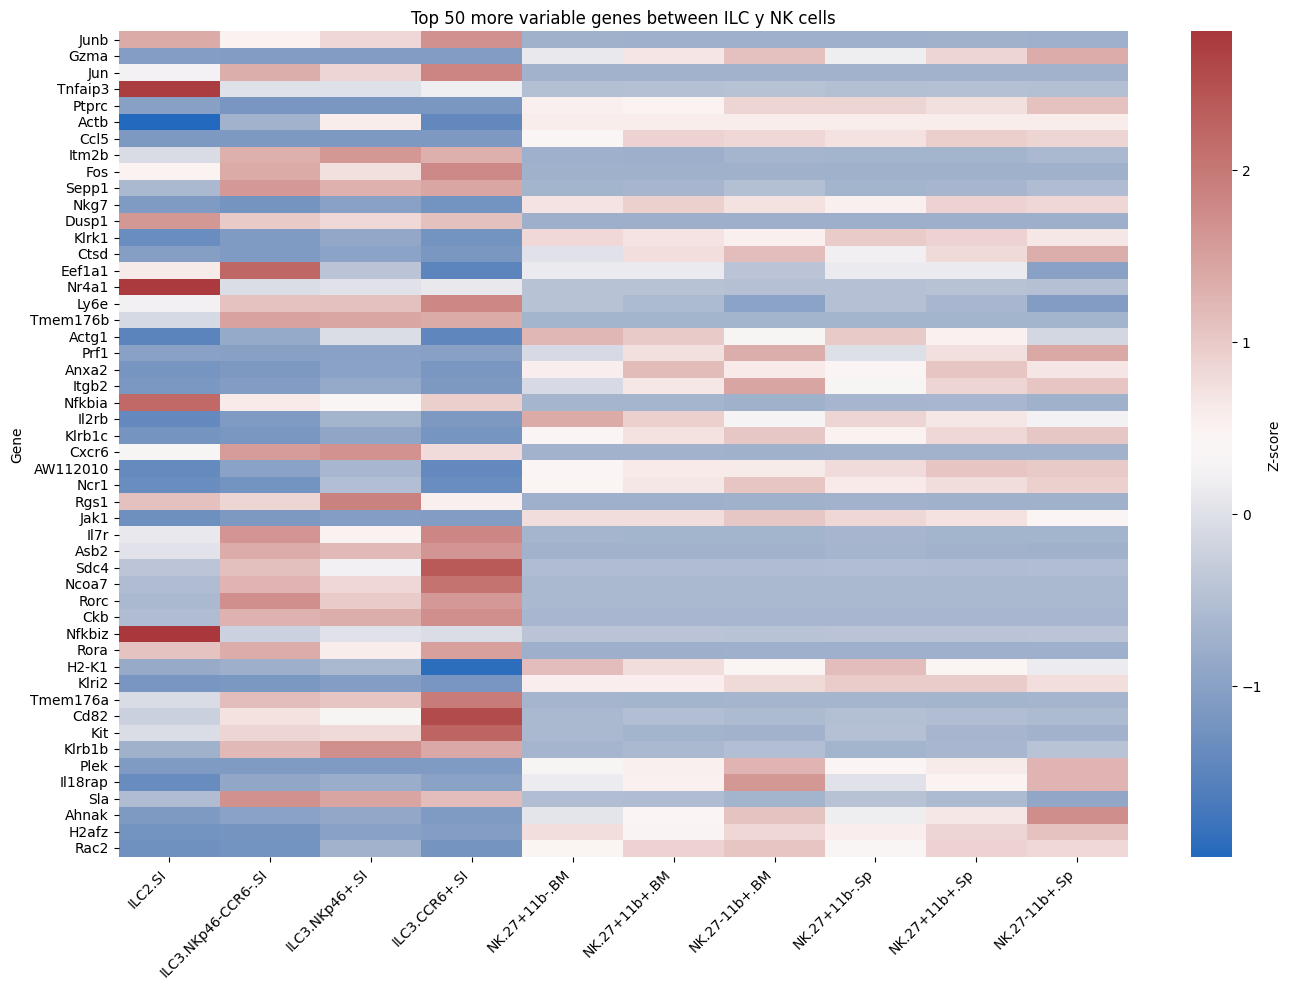

In [46]:
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_zscore, cmap="vlag", yticklabels=True, xticklabels=True, cbar_kws={"label": "Z-score"})
plt.title("Top 50 more variable genes between ILC y NK cells")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

b) Are there subclusters of special interest?

Hierarchical Clustering for RNA-seq

In [47]:
pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


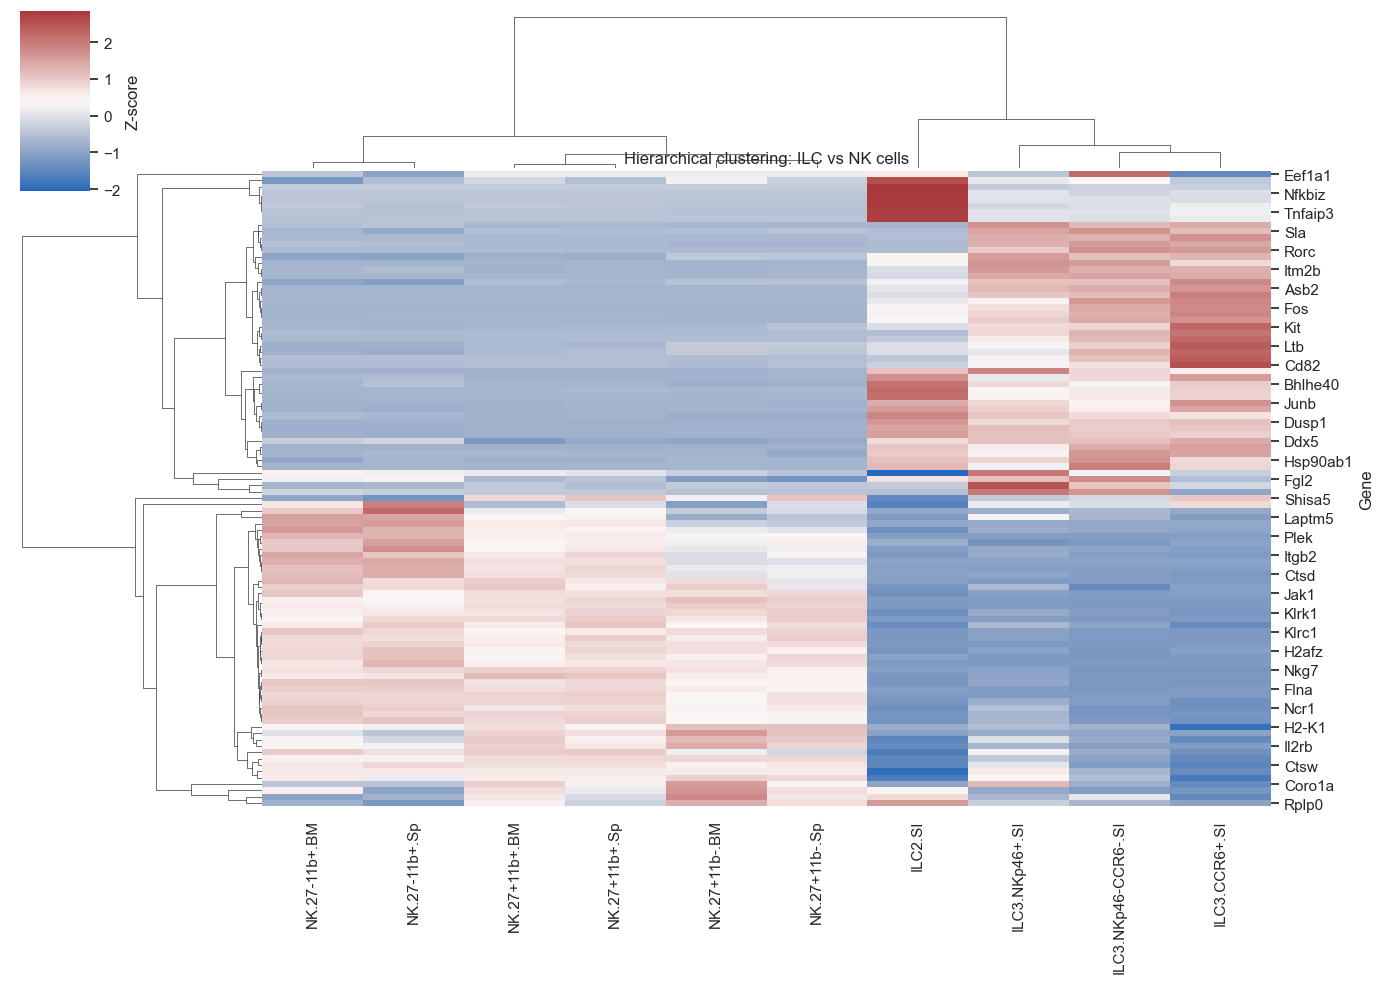

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/mmc2.csv")  

genes = df.iloc[:, 0]
expression_data = df.iloc[:, 1:]

ilc_columns = [col for col in expression_data.columns if "ILC" in col]
nk_columns = [col for col in expression_data.columns if "NK" in col]
nk27_columns = [col for col in nk_columns if col.startswith("NK.27")]

cluster_columns = ilc_columns + nk27_columns
expression_cluster = expression_data[cluster_columns].copy()
expression_cluster["Gene"] = genes
expression_cluster.set_index("Gene", inplace=True)


gene_variances = expression_cluster.var(axis=1)
top_variable_genes = gene_variances.sort_values(ascending=False).head(100).index
cluster_data = expression_cluster.loc[top_variable_genes]

cluster_data_z = (cluster_data - cluster_data.mean(axis=1).values[:, None]) / cluster_data.std(axis=1).values[:, None]

sns.set(context="notebook", style="white")
g = sns.clustermap(
    cluster_data_z,
    method="average",
    metric="correlation",
    cmap="vlag",
    xticklabels=True,
    yticklabels="auto",
    figsize=(14, 10),
    cbar_kws={"label": "Z-score"}
)
g.ax_heatmap.set_title("Hierarchical clustering: ILC vs NK cells")
plt.show()


In [113]:
cluster_data_z

,ILC2.SI,ILC3.NKp46-CCR6-.SI,ILC3.NKp46+.SI,ILC3.CCR6+.SI,NK.27+11b-.BM,NK.27+11b+.BM,NK.27-11b+.BM,NK.27+11b-.Sp,NK.27+11b+.Sp,NK.27-11b+.Sp
Gene,,,,,,,,,,
Junb,1.365280,0.513523,0.850120,1.697935,-0.728758,-0.738090,-0.738989,-0.752255,-0.726528,-0.742239
Gzma,-1.069251,-1.083666,-1.083598,-1.083505,0.123627,0.686400,1.110851,0.177440,0.871770,1.349932
Jun,0.249786,1.332330,0.864755,1.833378,-0.713920,-0.712320,-0.714538,-0.714732,-0.711997,-0.712742
Tnfaip3,2.742916,-0.002436,0.003806,0.193590,-0.497209,-0.492653,-0.474530,-0.495196,-0.483373,-0.494914
Ptprc,-1.021549,-1.196700,-1.172765,-1.185493,0.544639,0.489163,0.857453,0.857453,0.731158,1.096640
...,...,...,...,...,...,...,...,...,...,...
Gzmb,-0.918366,-0.914214,-0.902172,-0.904680,-0.277396,0.603084,1.481247,-0.384077,0.634164,1.582411
Vim,-1.253520,-1.431440,-0.637027,-1.058057,0.966904,1.020564,0.949095,0.072844,0.557809,0.812827
Laptm5,-1.145461,-0.691075,0.265626,-1.127665,-0.857008,0.469201,1.527306,-0.429290,0.536045,1.452322


Finding DEGs in ILC compared to other cell types to answer a) 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

expr = pd.read_csv('./data/mmc2.csv', index_col=0)

def assign_group(col_name):
    if 'NK.27' in col_name:
        return 'NK.27'
    elif 'ILC' in col_name:
        return 'ILC'
    else:
        return 'Other'

groups = expr.columns.to_series().apply(assign_group)

nk_samples = groups[groups == 'NK.27'].index
ilc_samples = groups[groups == 'ILC'].index
other_samples = groups[groups == 'Other'].index

selected_samples = nk_samples.tolist() + ilc_samples.tolist()

results = []
for gene in expr.index:
    group1 = expr.loc[gene, selected_samples]
    group2 = expr.loc[gene, other_samples]
    stat, pval = ttest_ind(group1, group2, equal_var=False)
    mean_diff = group1.mean() - group2.mean()
    results.append({'gene': gene, 'pval': pval, 'mean_diff': mean_diff})

de_df = pd.DataFrame(results)
de_df = de_df.sort_values(by='mean_diff', ascending=False)

top_genes = de_df.head(30)['gene'].tolist()

In [139]:
top_genes

['Gzma',
 'Junb',
 'Klrk1',
 'Jun',
 'H2-K1',
 'Nkg7',
 'Ccl5',
 'AW112010',
 'Ptprc',
 'Il2rb',
 'Ncr1',
 'Klrb1c',
 'Jak1',
 'Id2',
 'Prf1',
 'Fos',
 'Itm2b',
 'Il18rap',
 'Klri2',
 'Dusp1',
 'Actb',
 'Selplg',
 'Sepp1',
 'Tnfaip3',
 'Ctsd',
 'Gimap4',
 'Ahnak',
 'Itgb2',
 'Anxa2',
 'Gimap3']

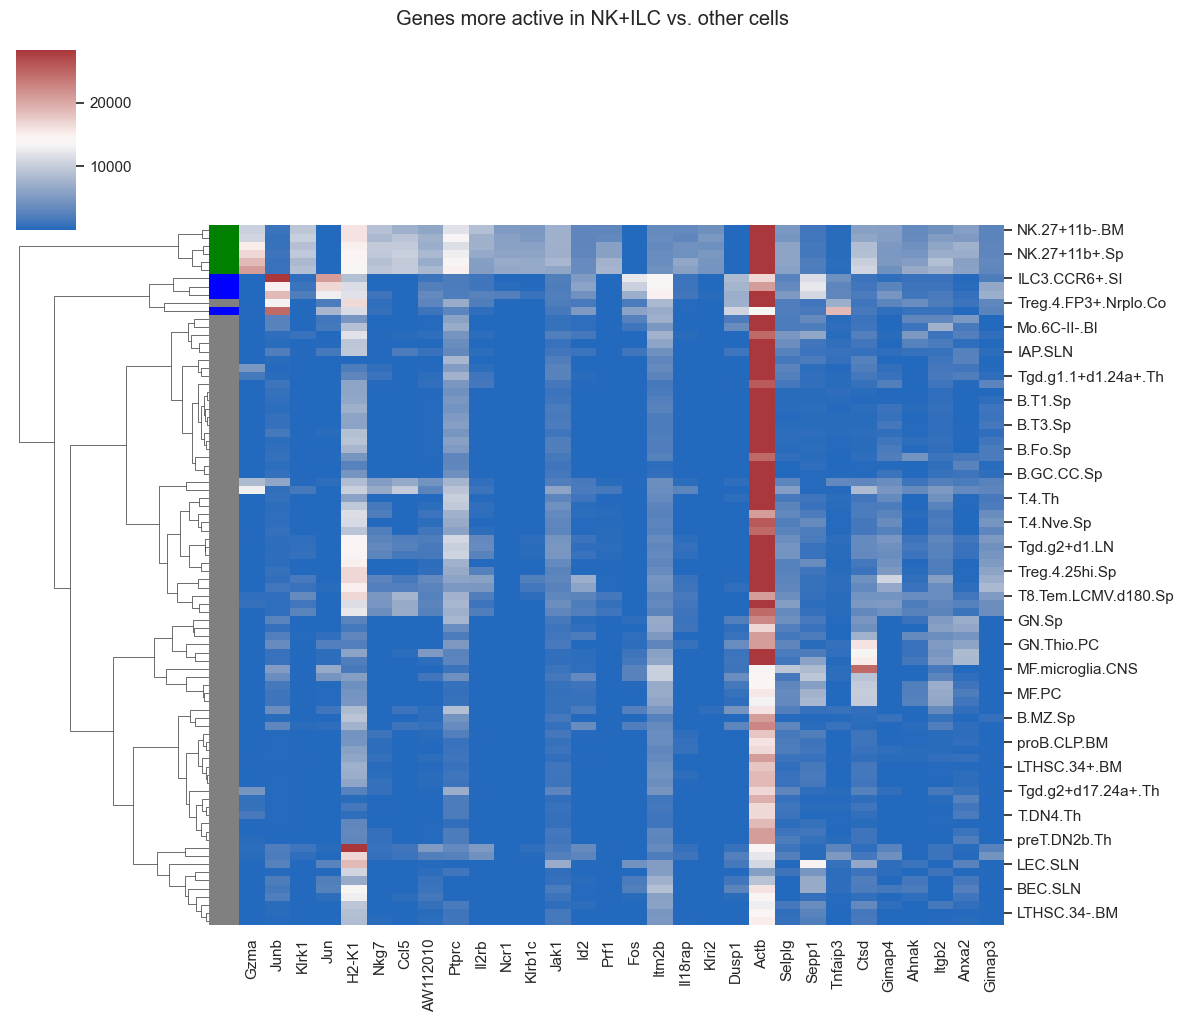

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

expr_top = expr.loc[top_genes]

expr_top_t = expr_top.T

linkage_matrix = linkage(expr_top_t, method='ward')

row_colors = groups.map({'NK.27': 'green', 'ILC': 'blue', 'Other': 'gray'})

sns.clustermap(expr_top_t, row_linkage=linkage_matrix,
               col_cluster=False, row_colors=row_colors,
               cmap='vlag', figsize=(12, 10), xticklabels=True)

plt.suptitle('Genes more active in NK+ILC vs. other cells', y=1.02)
plt.show()